# import 및 한글 인코딩


In [1]:
# # 한글깨짐 현상 -> 파일 열자마자 설치하고 주석처리 한 다음에 런타임 다시 돌리기 !
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/세종시/data/9.세종시_단독다가구(전월세)_실거래가.csv')
df.head()

,계약년월,계약일,시군구,도로조건,계약면적(㎡),전월세구분,보증금(만원),월세(만원),건축년도
0,201707,28,세종특별자치시 고운동,25m미만,249.78,전세,"30,000",0,2015.0
1,201706,2,세종특별자치시 금남면 감성리,8m미만,51.34,월세,"3,000",20,1973.0
2,201712,1,세종특별자치시 금남면 대박리,12m미만,70.20,월세,"2,000",80,2014.0
3,201712,15,세종특별자치시 금남면 도남리,8m미만,112.63,월세,"5,000",55,1998.0
4,201712,3,세종특별자치시 금남면 도암리,8m미만,20.00,월세,100,10,1999.0


#전처리

## object형 -> 수치형

In [4]:
#  보증금액(o bject형) --> 수치형으로 변환
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4605 entries, 0 to 4604
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   계약년월     4605 non-null   int64  
 1   계약일      4605 non-null   int64  
 2   시군구      4605 non-null   object 
 3   도로조건     4605 non-null   object 
 4   계약면적(㎡)  4605 non-null   float64
 5   전월세구분    4605 non-null   object 
 6   보증금(만원)  4605 non-null   object 
 7   월세(만원)   4605 non-null   int64  
 8   건축년도     4372 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 323.9+ KB


In [5]:
df['보증금(만원)'] = df['보증금(만원)'].str.replace(',', '').astype('int64')
df.head()

,계약년월,계약일,시군구,도로조건,계약면적(㎡),전월세구분,보증금(만원),월세(만원),건축년도
0,201707,28,세종특별자치시 고운동,25m미만,249.78,전세,30000,0,2015.0
1,201706,2,세종특별자치시 금남면 감성리,8m미만,51.34,월세,3000,20,1973.0
2,201712,1,세종특별자치시 금남면 대박리,12m미만,70.20,월세,2000,80,2014.0
3,201712,15,세종특별자치시 금남면 도남리,8m미만,112.63,월세,5000,55,1998.0
4,201712,3,세종특별자치시 금남면 도암리,8m미만,20.00,월세,100,10,1999.0


## 컬럼 병합 or 추가

In [6]:
# '동네' 컬럼 추출하기

df['동네'] = df.시군구.str.split(' ').str[1]
df.head()

,계약년월,계약일,시군구,도로조건,계약면적(㎡),전월세구분,보증금(만원),월세(만원),건축년도,동네
0,201707,28,세종특별자치시 고운동,25m미만,249.78,전세,30000,0,2015.0,고운동
1,201706,2,세종특별자치시 금남면 감성리,8m미만,51.34,월세,3000,20,1973.0,금남면
2,201712,1,세종특별자치시 금남면 대박리,12m미만,70.20,월세,2000,80,2014.0,금남면
3,201712,15,세종특별자치시 금남면 도남리,8m미만,112.63,월세,5000,55,1998.0,금남면
4,201712,3,세종특별자치시 금남면 도암리,8m미만,20.00,월세,100,10,1999.0,금남면


In [7]:
# 전월세 상관없이 전세금으로 바꾸어주는 작업

df['전세보증금(전세변환)'] = df['월세(만원)'] *12*100/2.5  # 전세금 구하는 공식
df

,계약년월,계약일,시군구,도로조건,계약면적(㎡),전월세구분,보증금(만원),월세(만원),건축년도,동네,전세보증금(전세변환)
0,201707,28,세종특별자치시 고운동,25m미만,249.78,전세,30000,0,2015.0,고운동,0.0
1,201706,2,세종특별자치시 금남면 감성리,8m미만,51.34,월세,3000,20,1973.0,금남면,9600.0
2,201712,1,세종특별자치시 금남면 대박리,12m미만,70.20,월세,2000,80,2014.0,금남면,38400.0
3,201712,15,세종특별자치시 금남면 도남리,8m미만,112.63,월세,5000,55,1998.0,금남면,26400.0
4,201712,3,세종특별자치시 금남면 도암리,8m미만,20.00,월세,100,10,1999.0,금남면,4800.0
...,...,...,...,...,...,...,...,...,...,...,...
4600,202006,21,세종특별자치시 조치원읍 평리,8m미만,64.62,월세,2000,20,1993.0,조치원읍,9600.0
4601,202011,7,세종특별자치시 조치원읍 평리,8m미만,65.00,월세,300,47,2014.0,조치원읍,22560.0
4602,202008,10,세종특별자치시 조치원읍 평리,-,67.25,전세,6000,0,1985.0,조치원읍,0.0
4603,202002,24,세종특별자치시 조치원읍 평리,8m미만,90.22,전세,6000,0,1985.0,조치원읍,0.0


## 월세집에 전세변환율을 적용하여 전세보증금 구하기

In [8]:
df11 = df[df['전월세구분']=='전세']
df11.head()

,계약년월,계약일,시군구,도로조건,계약면적(㎡),전월세구분,보증금(만원),월세(만원),건축년도,동네,전세보증금(전세변환)
0,201707,28,세종특별자치시 고운동,25m미만,249.78,전세,30000,0,2015.0,고운동,0.0
8,201707,15,세종특별자치시 금남면 성덕리,8m미만,30.00,전세,2000,0,1986.0,금남면,0.0
10,201712,6,세종특별자치시 금남면 용포리,8m미만,19.80,전세,4000,0,2013.0,금남면,0.0
12,201705,16,세종특별자치시 금남면 용포리,8m미만,20.00,전세,4000,0,2013.0,금남면,0.0
13,201704,24,세종특별자치시 금남면 용포리,8m미만,20.00,전세,3500,0,2013.0,금남면,0.0


In [9]:
df22 = df[df['전월세구분']=='월세']
df22.head()

,계약년월,계약일,시군구,도로조건,계약면적(㎡),전월세구분,보증금(만원),월세(만원),건축년도,동네,전세보증금(전세변환)
1,201706,2,세종특별자치시 금남면 감성리,8m미만,51.34,월세,3000,20,1973.0,금남면,9600.0
2,201712,1,세종특별자치시 금남면 대박리,12m미만,70.20,월세,2000,80,2014.0,금남면,38400.0
3,201712,15,세종특별자치시 금남면 도남리,8m미만,112.63,월세,5000,55,1998.0,금남면,26400.0
4,201712,3,세종특별자치시 금남면 도암리,8m미만,20.00,월세,100,10,1999.0,금남면,4800.0
5,201710,24,세종특별자치시 금남면 두만리,8m미만,44.84,월세,300,20,1954.0,금남면,9600.0


In [10]:
#월세집에 있는 보증금을 0으로 만들어주는 작업

df22['보증금(만원)'] = df22['보증금(만원)'] *0
df22.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,계약년월,계약일,시군구,도로조건,계약면적(㎡),전월세구분,보증금(만원),월세(만원),건축년도,동네,전세보증금(전세변환)
1,201706,2,세종특별자치시 금남면 감성리,8m미만,51.34,월세,0,20,1973.0,금남면,9600.0
2,201712,1,세종특별자치시 금남면 대박리,12m미만,70.20,월세,0,80,2014.0,금남면,38400.0
3,201712,15,세종특별자치시 금남면 도남리,8m미만,112.63,월세,0,55,1998.0,금남면,26400.0
4,201712,3,세종특별자치시 금남면 도암리,8m미만,20.00,월세,0,10,1999.0,금남면,4800.0
5,201710,24,세종특별자치시 금남면 두만리,8m미만,44.84,월세,0,20,1954.0,금남면,9600.0


In [11]:
df= pd.concat([df22,df11])
df

,계약년월,계약일,시군구,도로조건,계약면적(㎡),전월세구분,보증금(만원),월세(만원),건축년도,동네,전세보증금(전세변환)
1,201706,2,세종특별자치시 금남면 감성리,8m미만,51.34,월세,0,20,1973.0,금남면,9600.0
2,201712,1,세종특별자치시 금남면 대박리,12m미만,70.20,월세,0,80,2014.0,금남면,38400.0
3,201712,15,세종특별자치시 금남면 도남리,8m미만,112.63,월세,0,55,1998.0,금남면,26400.0
4,201712,3,세종특별자치시 금남면 도암리,8m미만,20.00,월세,0,10,1999.0,금남면,4800.0
5,201710,24,세종특별자치시 금남면 두만리,8m미만,44.84,월세,0,20,1954.0,금남면,9600.0
...,...,...,...,...,...,...,...,...,...,...,...
4590,202002,8,세종특별자치시 조치원읍 침산리,12m미만,84.00,전세,6000,0,2014.0,조치원읍,0.0
4593,202005,1,세종특별자치시 조치원읍 침산리,12m미만,115.80,전세,15500,0,2020.0,조치원읍,0.0
4596,202008,1,세종특별자치시 조치원읍 평리,-,44.28,전세,3000,0,1984.0,조치원읍,0.0
4602,202008,10,세종특별자치시 조치원읍 평리,-,67.25,전세,6000,0,1985.0,조치원읍,0.0


In [12]:
df['전세보증금(전세변환)'].max()

96000.0

In [13]:
df['보증금(만원)'].max()

59000

In [14]:
df['최종보증금(만원)'] = df['보증금(만원)']+df['전세보증금(전세변환)']
df

,계약년월,계약일,시군구,도로조건,계약면적(㎡),전월세구분,보증금(만원),월세(만원),건축년도,동네,전세보증금(전세변환),최종보증금(만원)
1,201706,2,세종특별자치시 금남면 감성리,8m미만,51.34,월세,0,20,1973.0,금남면,9600.0,9600.0
2,201712,1,세종특별자치시 금남면 대박리,12m미만,70.20,월세,0,80,2014.0,금남면,38400.0,38400.0
3,201712,15,세종특별자치시 금남면 도남리,8m미만,112.63,월세,0,55,1998.0,금남면,26400.0,26400.0
4,201712,3,세종특별자치시 금남면 도암리,8m미만,20.00,월세,0,10,1999.0,금남면,4800.0,4800.0
5,201710,24,세종특별자치시 금남면 두만리,8m미만,44.84,월세,0,20,1954.0,금남면,9600.0,9600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4590,202002,8,세종특별자치시 조치원읍 침산리,12m미만,84.00,전세,6000,0,2014.0,조치원읍,0.0,6000.0
4593,202005,1,세종특별자치시 조치원읍 침산리,12m미만,115.80,전세,15500,0,2020.0,조치원읍,0.0,15500.0
4596,202008,1,세종특별자치시 조치원읍 평리,-,44.28,전세,3000,0,1984.0,조치원읍,0.0,3000.0
4602,202008,10,세종특별자치시 조치원읍 평리,-,67.25,전세,6000,0,1985.0,조치원읍,0.0,6000.0


#불필요한 컬럼 삭제

In [15]:
df2 = df.drop(['계약년월', '계약일','시군구','보증금(만원)','월세(만원)','전세보증금(전세변환)'],axis=1)
df2.head()

,도로조건,계약면적(㎡),전월세구분,건축년도,동네,최종보증금(만원)
1,8m미만,51.34,월세,1973.0,금남면,9600.0
2,12m미만,70.20,월세,2014.0,금남면,38400.0
3,8m미만,112.63,월세,1998.0,금남면,26400.0
4,8m미만,20.00,월세,1999.0,금남면,4800.0
5,8m미만,44.84,월세,1954.0,금남면,9600.0


#One hot Encoding

In [16]:
# 동네 인코딩
df_oh1 = pd.get_dummies(df2['동네'])
df_oh1.head()

,고운동,금남면,나성동,도담동,부강면,소담동,소정면,아름동,어진동,연기면,연동면,연서면,장군면,전동면,전의면,조치원읍,종촌동
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# 전월세 인코딩
df_oh2 = pd.get_dummies(df2['전월세구분'])
df_oh2.head()

,월세,전세
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


In [18]:
#도로조건 인코딩
df_oh3 = pd.get_dummies(df2['도로조건'])
df_oh3.head()

,-,12m미만,25m미만,25m이상,8m미만
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,0,1


In [19]:
df_oh3.drop(['-'],axis=1, inplace=True)

In [20]:
# 인코딩한 값들 합치기

df_oh = pd.concat([df2,df_oh1,df_oh2,df_oh3],axis=1)
df_oh.head()

,도로조건,계약면적(㎡),전월세구분,건축년도,동네,최종보증금(만원),고운동,금남면,나성동,도담동,부강면,소담동,소정면,아름동,어진동,연기면,연동면,연서면,장군면,전동면,전의면,조치원읍,종촌동,월세,전세,12m미만,25m미만,25m이상,8m미만
1,8m미만,51.34,월세,1973.0,금남면,9600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,12m미만,70.20,월세,2014.0,금남면,38400.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,8m미만,112.63,월세,1998.0,금남면,26400.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,8m미만,20.00,월세,1999.0,금남면,4800.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,8m미만,44.84,월세,1954.0,금남면,9600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [21]:
# 원핫 인코딩 후 불필요한 컬럼 삭제
df_oh.drop(['전월세구분','동네','도로조건'], axis=1, inplace=True)
df_oh.head()

,계약면적(㎡),건축년도,최종보증금(만원),고운동,금남면,나성동,도담동,부강면,소담동,소정면,아름동,어진동,연기면,연동면,연서면,장군면,전동면,전의면,조치원읍,종촌동,월세,전세,12m미만,25m미만,25m이상,8m미만
1,51.34,1973.0,9600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,70.20,2014.0,38400.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,112.63,1998.0,26400.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,20.00,1999.0,4800.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,44.84,1954.0,9600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [22]:
df_oh.columns

Index(['계약면적(㎡)', '건축년도', '최종보증금(만원)', '고운동', '금남면', '나성동', '도담동', '부강면',
       '소담동', '소정면', '아름동', '어진동', '연기면', '연동면', '연서면', '장군면', '전동면', '전의면',
       '조치원읍', '종촌동', '월세', '전세', '12m미만', '25m미만', '25m이상', '8m미만'],
      dtype='object')

#heatmap

In [23]:
df_oh = df_oh[['계약면적(㎡)', '건축년도', '고운동', '금남면', '나성동', '도담동', '부강면',
       '소담동', '소정면', '아름동', '어진동', '연기면', '연동면', '연서면', '장군면', '전동면', '전의면',
       '조치원읍', '종촌동', '월세', '전세', '12m미만', '25m미만', '25m이상', '8m미만', '최종보증금(만원)']]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


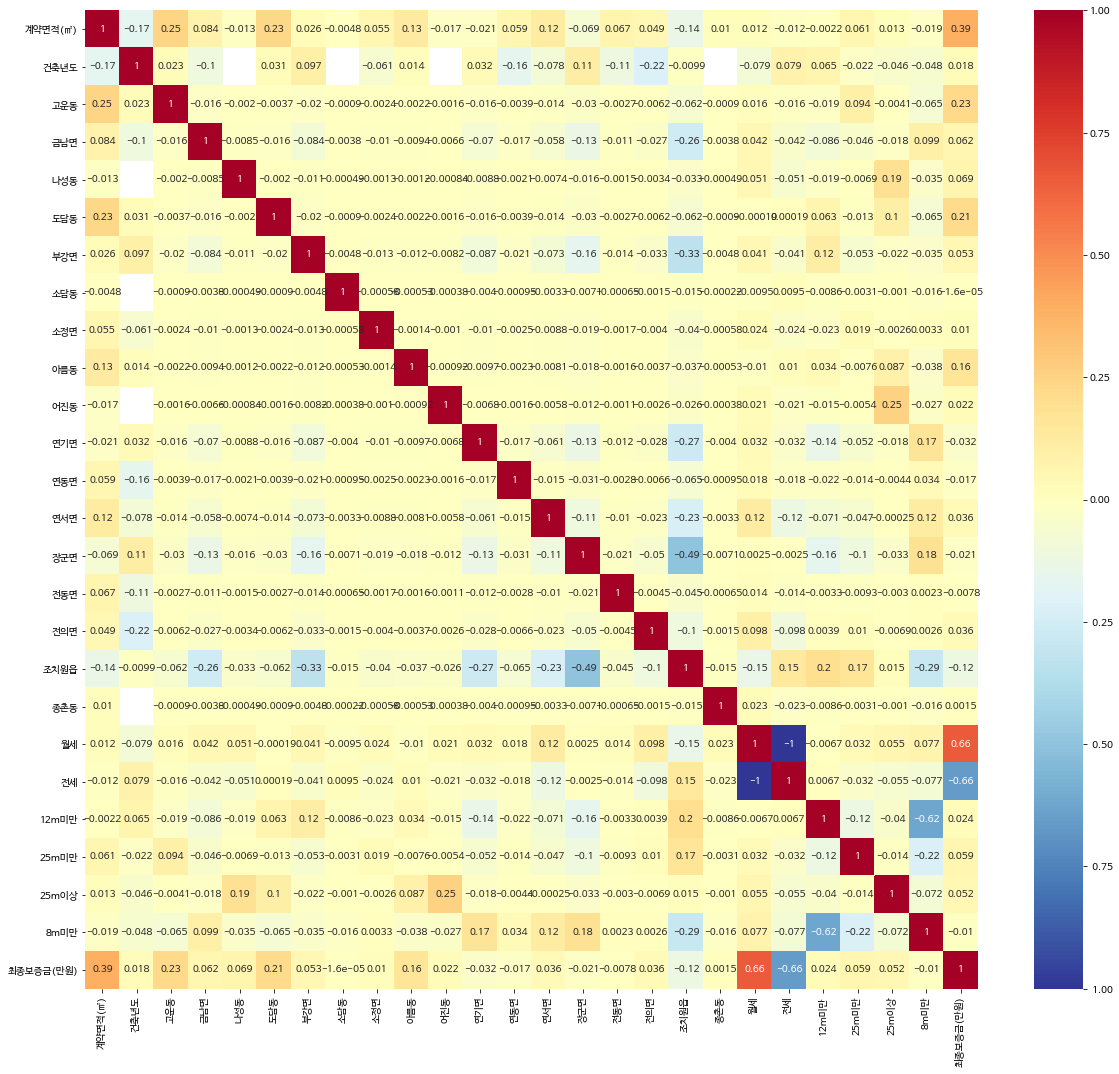

In [24]:
plt.figure(figsize=(20,18))
sns.heatmap(df_oh.corr(), annot=True, cmap = 'RdYlBu_r',vmin = -1, vmax = 1)
plt.show()

# 결론 
- 연립다세대(주택)인 만큼 층이 가격에 미치는 영향이 큰편
-  자연친화적인 주거환경을 가지고 있음. 또한 시청, 교육청, 우체국 등의 행정기관이 위치하여 명실상부한 세종시의 도시행정타운이자 행정의 중심동임.
- 도담동 역시 아파트가 많이 위치해있는 주거지역